# Predicting Cervical Cancer
Capstone Project #2 for Springboard Data Science

Saatvik Ramisetty

## Project

About 11,000 new cases of invasive cervical cancer are diagnosed each year in the U.S. However, the number of new cervical cancer cases has been declining steadily over the past decades. Although it is the most preventable type of cancer, each year cervical cancer kills about *4,000* women in the U.S. and about *300,000* women worldwide. In the United States, cervical cancer mortality rates plunged by 74% from 1955 - 1992 thanks to increased screening and early detection with the Pap test.


This project can help improve cancer risk detection and recognizing the symptoms that cause cervical cancer in women. Machine Learning plays an important in improving healthcare and understanding cancer and it’s causes.

## Data

Dataset & Research paper available at [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29) and [Paper](https://pdfs.semanticscholar.org/1c02/438ba4dfa775399ba414508e9cd335b69012.pdf)

The dataset comprises demographic information, habits, and historic medical records of 858 patients. Data covers a wide range of information including details like number of sexual partners, number of years the patient has been smoking for, number of pregnancies and if the patient has STDs.

## Methodology

We're trying to understand what are the factors that lead up to biopsy. We need a systematic approach of exploratory data analysis and modelling.

### Libraries

1. **Pandas**
    - data loading, wrangling, cleaning, and manipulation
    - feature selection and engineering
    - descriptive statistics
        
2. **numpy**
    - array data structure, the primary input for classifiers
    - model comparison
    - matrix manipulation
        
3. **scipy,sci-kit**
    - Normalization and standardization
       
4. **Seaborn and Matplotlib** 
    - for visualization

5. **RandomForest** 
    - Model Selection

6. **Logistic Regression**
    - Model Selection

6. **GridSearchCV**
    - Hyperparameter Tuning

7. **Stats**
    - Chi Square Test
    - T-Tests

In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

from sklearn.metrics import recall_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Getting working directory

import os
cwd = os.getcwd()
cwd

'C:\\Users\\sramisetty\\Documents\\GitHub\\Predicting-Cervical-Cancer2\\Capstone2'

In [2]:
%config IPCompleter.greedy=True ## Autocomplete Tabs

## Data Observation & Pre-Processing

Data is imported from the excel spreadsheet provided on the website. It is important to tackle the missing information which is done by converting the objects into numeric values and separating the categorical and numerical variables.

Missing values have '?' which are replaced by NaN to understand the number of missing values. 

In [3]:
df_full = pd.read_csv('C:/Users/sramisetty/Documents/GitHub/Predicting-Cervical-Cancer/Capstone2/kag_risk_factors_cervical_cancer.csv')
train = pd.read_csv('C:/Users/sramisetty/Documents/GitHub/Predicting-Cervical-Cancer/Capstone2/kag_risk_factors_cervical_cancer.csv')

# df_full = pd.read_csv('/Users/saatvik/My Jupyter Notebooks/Predicting-Cervical-Cancer/Capstone2/kag_risk_factors_cervical_cancer.csv')
# train = pd.read_csv('/Users/saatvik/My Jupyter Notebooks/Predicting-Cervical-Cancer/Capstone2/kag_risk_factors_cervical_cancer.csv')

df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null object
First sexual intercourse              858 non-null object
Num of pregnancies                    858 non-null object
Smokes                                858 non-null object
Smokes (years)                        858 non-null object
Smokes (packs/year)                   858 non-null object
Hormonal Contraceptives               858 non-null object
Hormonal Contraceptives (years)       858 non-null object
IUD                                   858 non-null object
IUD (years)                           858 non-null object
STDs                                  858 non-null object
STDs (number)                         858 non-null object
STDs:condylomatosis                   858 non-null object
STDs:cervical condylomatosis          858 non-null object
STDs:vaginal condylomatosi

## Data Distribution

Creating box-plot of the data to better visualize and understand the distributions

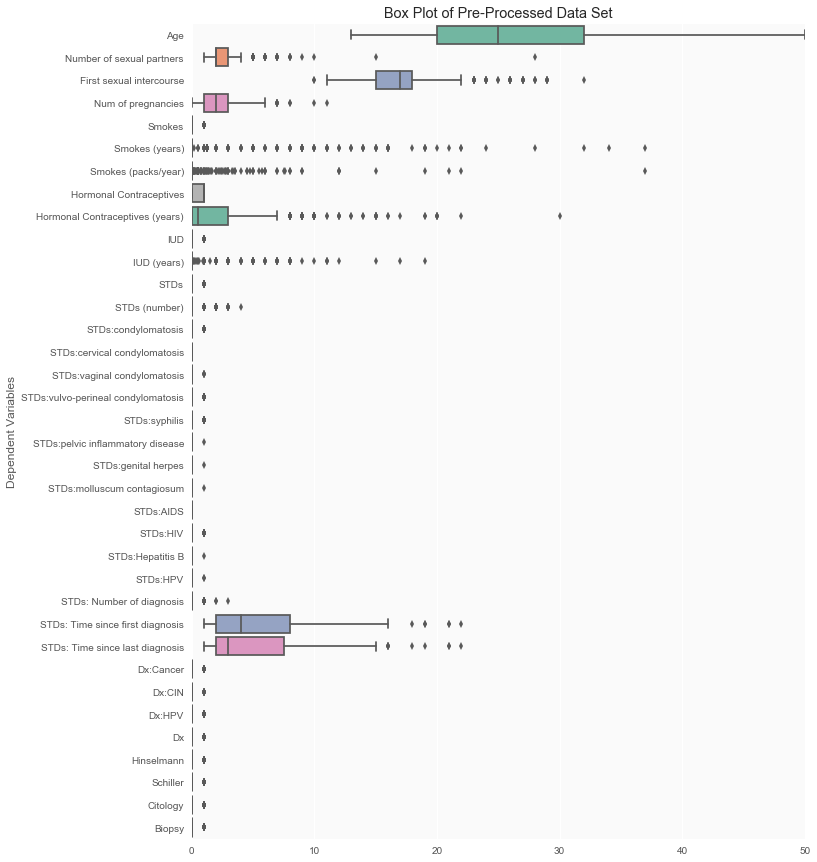

In [4]:
#train = pd.read_csv("/Users/saatvik/My Jupyter Notebooks/Predicting-Cervical-Cancer/Capstone2/kag_risk_factors_cervical_cancer.csv")

# process columns, apply object > numeric
for c in train.columns:
    if train[c].dtype == 'object':
        train[c] =pd.to_numeric(train[c], errors='coerce')

plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_axis_bgcolor('#fafafa')
ax.set(xlim=(-.05, 50))
plt.ylabel('Dependent Variables')
plt.title("Box Plot of Pre-Processed Data Set")
ax = sns.boxplot(data = train, orient = 'h', palette = 'Set2')

df = train

## Interesting Data Visualization

As you can see, cervical cancer is detected quite early in women (Ages 18-24)

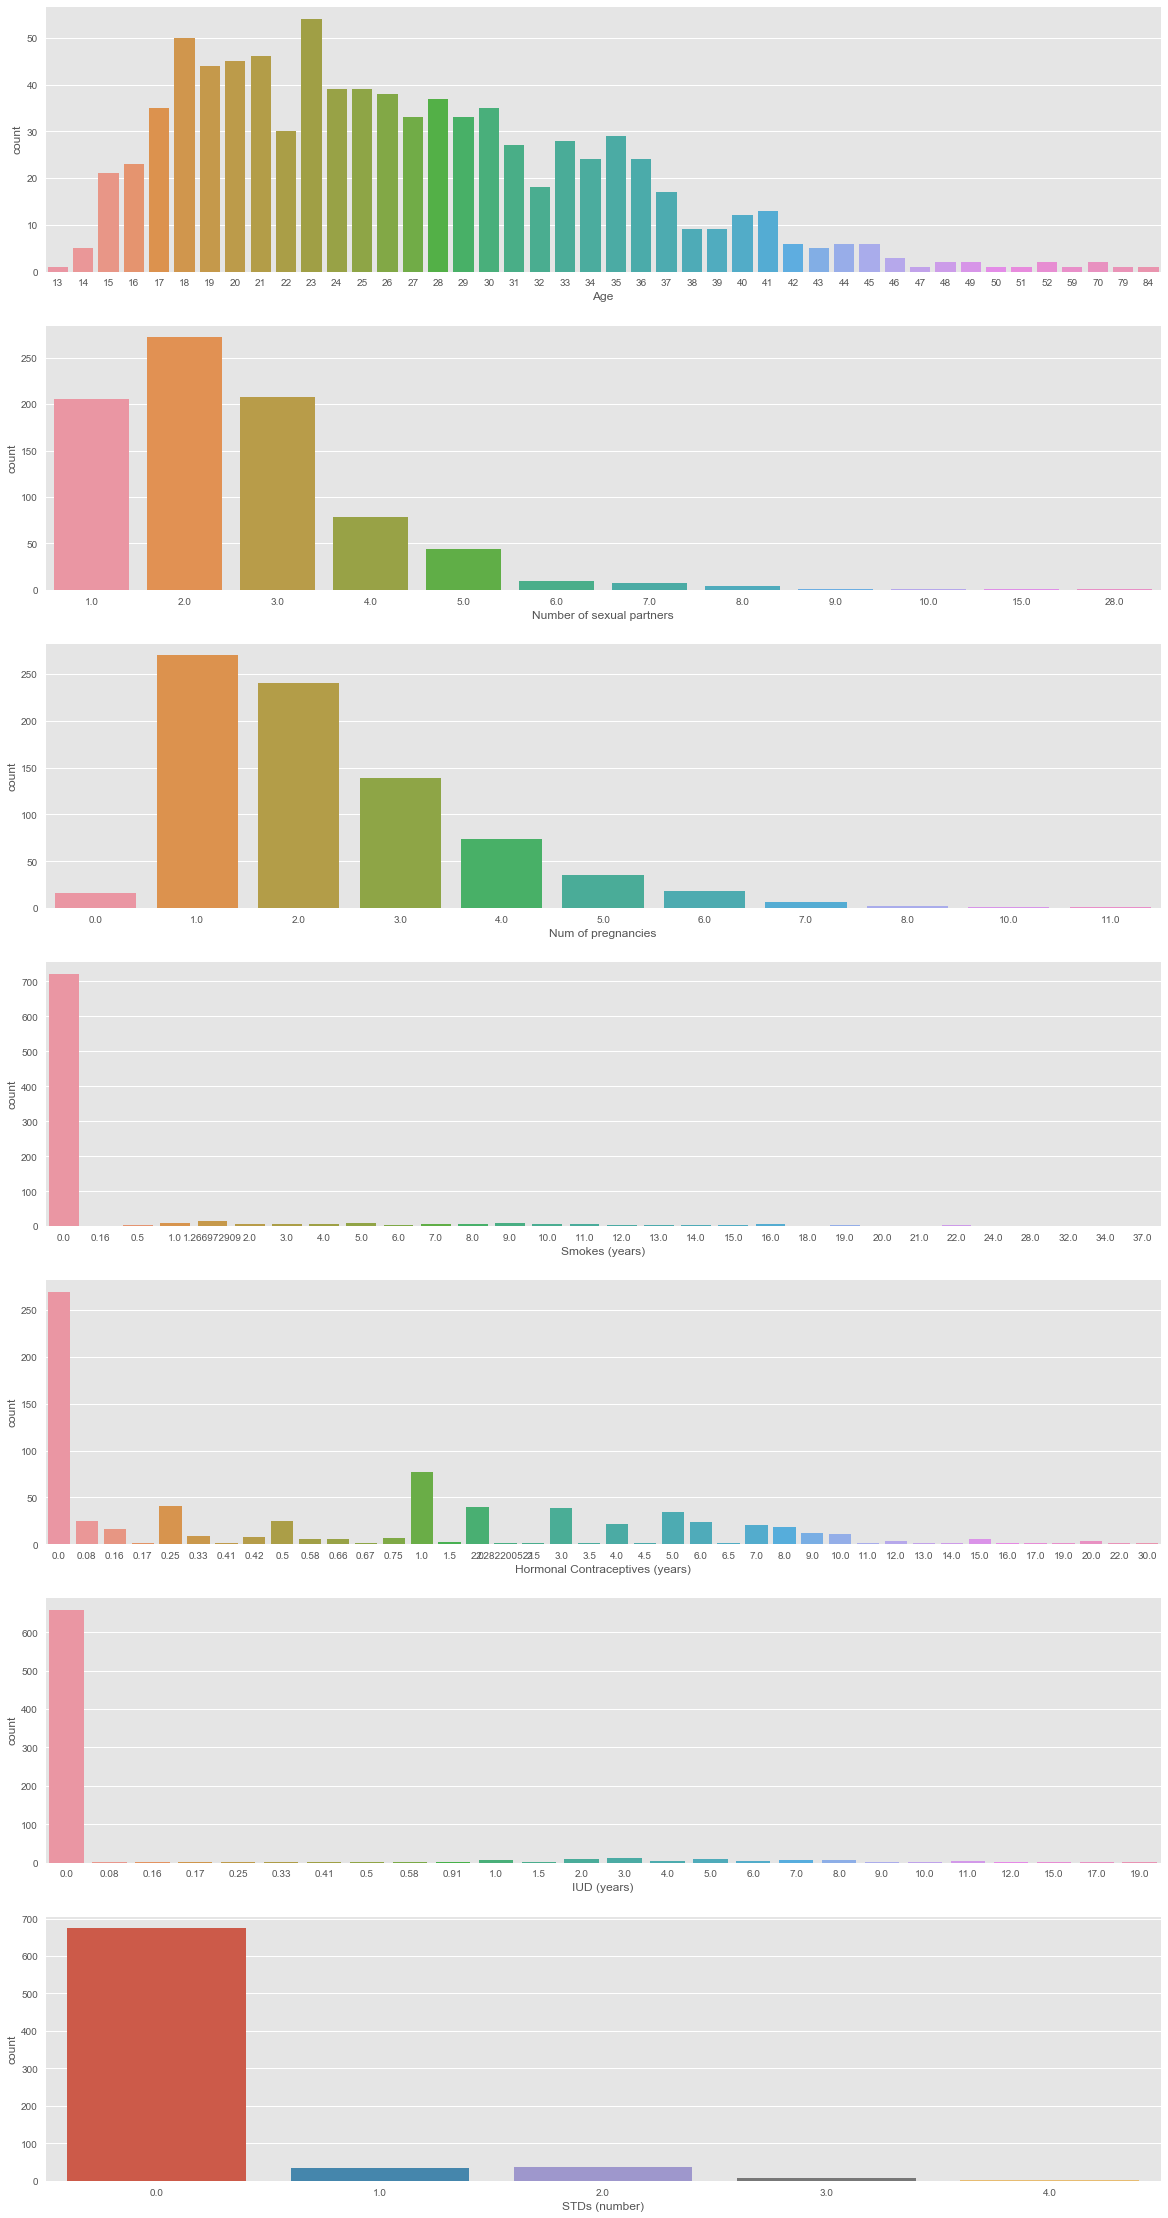

In [5]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,figsize=(20,40))
sns.countplot(x='Age', data=df, ax=ax1)
sns.countplot(x='Number of sexual partners', data=df, ax=ax2)
sns.countplot(x='Num of pregnancies', data=df, ax=ax3)
sns.countplot(x='Smokes (years)', data=df, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=df, ax=ax5)
sns.countplot(x='IUD (years)', data=df, ax=ax6)
sns.countplot(x='STDs (number)', data=df, ax=ax7)

## Age

Trying to understand the age distribution of women who need biopsy. As you can see, women of the age 20-40 are generally the ones affected.

Joint plot for "Biopsy"

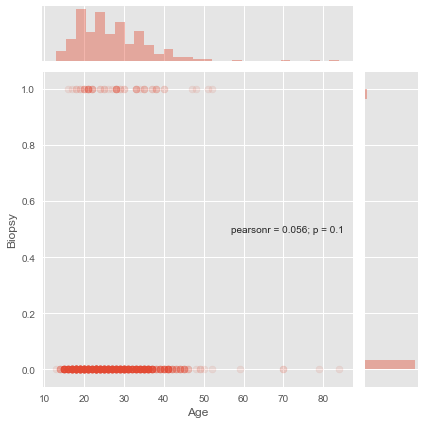

In [6]:
import seaborn as sns
sns.jointplot(x='Age', y='Biopsy', data=df, alpha=0.1) 
#By adding alpha, we can see the density of the scattered spots clearly.

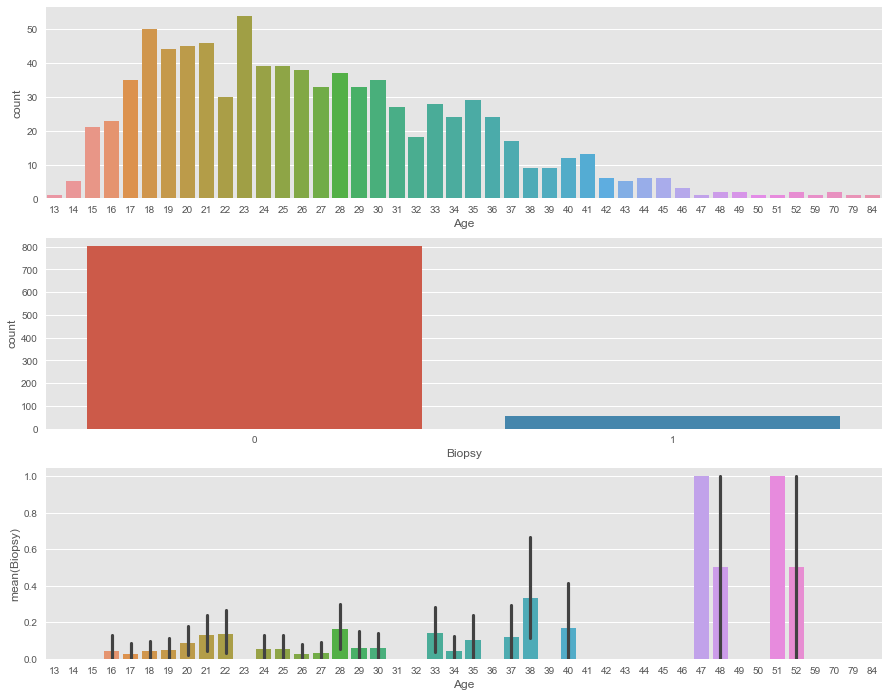

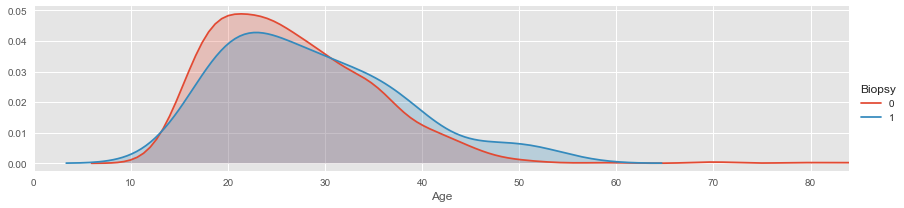

In [7]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,12))
sns.countplot(x='Age', data=df, ax=ax1)
sns.countplot(x='Biopsy', data=df, ax=ax2)
sns.barplot(x='Age', y='Biopsy', data=df, ax=ax3)

#Stratified
facet = sns.FacetGrid(df, hue='Biopsy',aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

## Number Of Sexual Partners

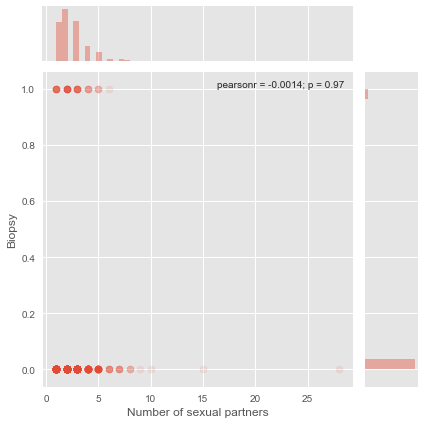

In [8]:
import seaborn as sns
sns.jointplot(x='Number of sexual partners', y='Biopsy', data=df, alpha=0.1) 
#By adding alpha, we can see the density of the scattered spots clearly.

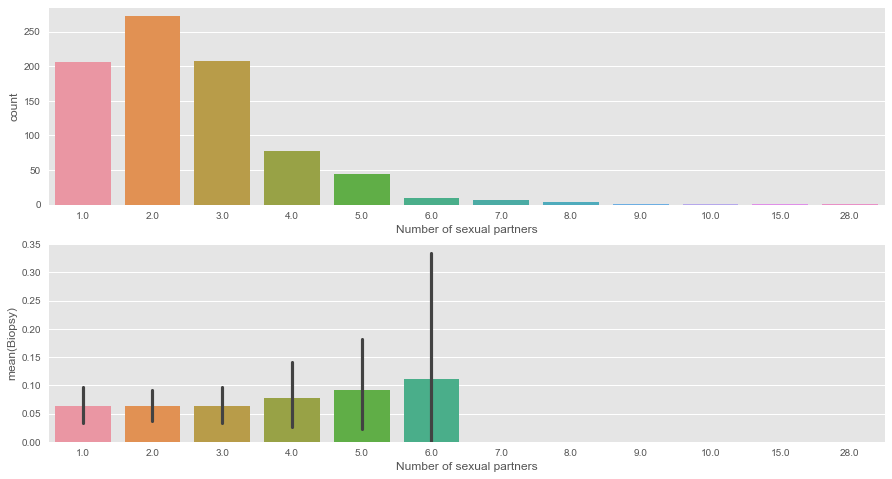

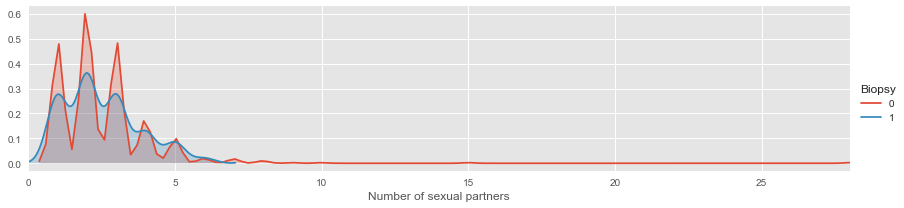

In [9]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,8))
sns.countplot(x='Number of sexual partners', data=df, ax=ax1)
sns.barplot(x='Number of sexual partners', y='Biopsy', data=df, ax=ax2) #categorical to categorical

#continuous to categorical
facet = sns.FacetGrid(df, hue='Biopsy',aspect=4)
facet.map(sns.kdeplot,'Number of sexual partners',shade= True)
facet.set(xlim=(0, df['Number of sexual partners'].max()))
facet.add_legend()

The people having more than 10 sexual partners got biopsy(-)

## Pregnancies

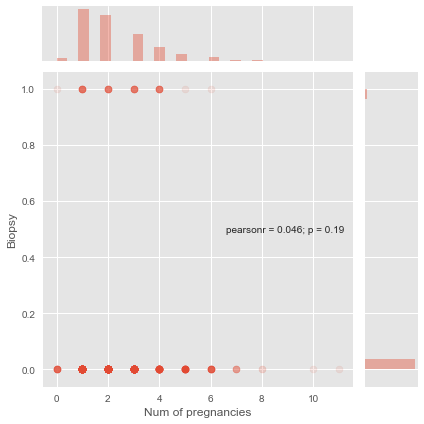

In [10]:
import seaborn as sns
sns.jointplot(x='Num of pregnancies', y='Biopsy', data=df, alpha=0.1) 

In [11]:
sns.countplot(x='Num of pregnancies', data=df, ax=ax1)

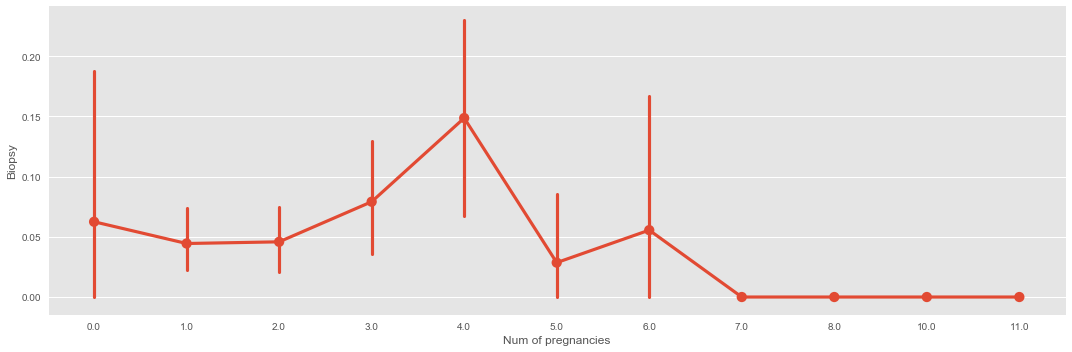

In [12]:
sns.factorplot('Num of pregnancies','Biopsy',data=df, size=5, aspect=3)

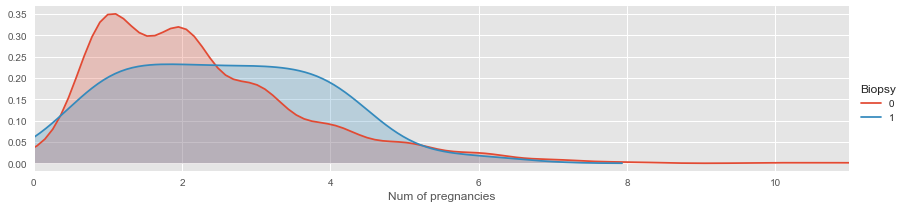

In [13]:
#continuous to categorical
facet = sns.FacetGrid(df, hue='Biopsy',aspect=4)
facet.map(sns.kdeplot,'Num of pregnancies',shade= True)
facet.set(xlim=(0, df['Num of pregnancies'].max()))
facet.add_legend()

## Heatmap of Top Correlation

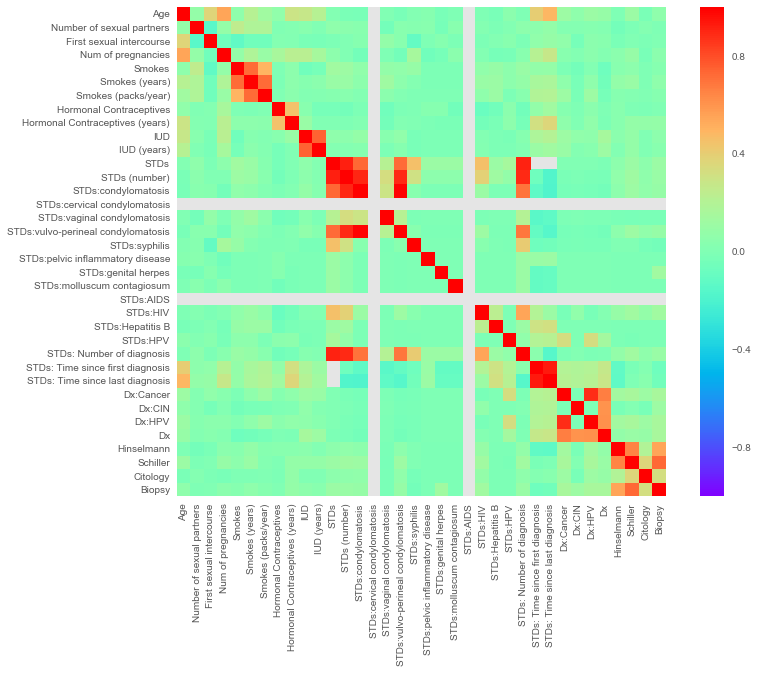

In [14]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True, cmap='rainbow')

Checking to see the correlation between Cervical Condylomatosis and AIDS.

In [15]:
df['STDs:cervical condylomatosis'].value_counts()

0.0    753
Name: STDs:cervical condylomatosis, dtype: int64

In [16]:
df['STDs:AIDS'].value_counts()

0.0    753
Name: STDs:AIDS, dtype: int64

The correlation was actually quite low between Cerivical Condylomatosis and AIDS

## Data Cleaning

Data can be extremely messy due to missing values and it's important to handle such data frames correctly.

In [17]:
df_full.iloc[0]

Age                                     18
Number of sexual partners              4.0
First sexual intercourse              15.0
Num of pregnancies                     1.0
Smokes                                 0.0
Smokes (years)                         0.0
Smokes (packs/year)                    0.0
Hormonal Contraceptives                0.0
Hormonal Contraceptives (years)        0.0
IUD                                    0.0
IUD (years)                            0.0
STDs                                   0.0
STDs (number)                          0.0
STDs:condylomatosis                    0.0
STDs:cervical condylomatosis           0.0
STDs:vaginal condylomatosis            0.0
STDs:vulvo-perineal condylomatosis     0.0
STDs:syphilis                          0.0
STDs:pelvic inflammatory disease       0.0
STDs:genital herpes                    0.0
STDs:molluscum contagiosum             0.0
STDs:AIDS                              0.0
STDs:HIV                               0.0
STDs:Hepati

### Check the number of rows with NAs ( Missing Values )

In [18]:
df_fullna = df_full.replace('?', np.nan)
df_fullna.isnull().sum() #Check the number of NAs in each column

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

Get rid of all the rows with missing values in the STDs columns.

In [19]:
df_fullna[df_fullna['STDs'].apply(lambda x: type(x)) != float].isnull().sum()

Age                                     0
Number of sexual partners              14
First sexual intercourse                6
Num of pregnancies                     47
Smokes                                 10
Smokes (years)                         10
Smokes (packs/year)                    10
Hormonal Contraceptives                13
Hormonal Contraceptives (years)        13
IUD                                    16
IUD (years)                            16
STDs                                    0
STDs (number)                           0
STDs:condylomatosis                     0
STDs:cervical condylomatosis            0
STDs:vaginal condylomatosis             0
STDs:vulvo-perineal condylomatosis      0
STDs:syphilis                           0
STDs:pelvic inflammatory disease        0
STDs:genital herpes                     0
STDs:molluscum contagiosum              0
STDs:AIDS                               0
STDs:HIV                                0
STDs:Hepatitis B                  

In [20]:
df_fullna = df_fullna[df_fullna['STDs'].notnull()]
df_fullna.isnull().sum()

Age                                     0
Number of sexual partners              14
First sexual intercourse                6
Num of pregnancies                     47
Smokes                                 10
Smokes (years)                         10
Smokes (packs/year)                    10
Hormonal Contraceptives                13
Hormonal Contraceptives (years)        13
IUD                                    16
IUD (years)                            16
STDs                                    0
STDs (number)                           0
STDs:condylomatosis                     0
STDs:cervical condylomatosis            0
STDs:vaginal condylomatosis             0
STDs:vulvo-perineal condylomatosis      0
STDs:syphilis                           0
STDs:pelvic inflammatory disease        0
STDs:genital herpes                     0
STDs:molluscum contagiosum              0
STDs:AIDS                               0
STDs:HIV                                0
STDs:Hepatitis B                  

In [21]:
df_fullna.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],inplace=True,axis=1)
## Too many missing values

In [22]:
df_fullna = df_fullna[df_fullna['IUD'].notnull()]
df_fullna = df_fullna[df_fullna['Hormonal Contraceptives'].notnull()]
df_fullna = df_fullna[df_fullna['Smokes'].notnull()]

df_fullna.isnull().sum()

Age                                    0
Number of sexual partners             14
First sexual intercourse               6
Num of pregnancies                    41
Smokes                                 0
Smokes (years)                         0
Smokes (packs/year)                    0
Hormonal Contraceptives                0
Hormonal Contraceptives (years)        0
IUD                                    0
IUD (years)                            0
STDs                                   0
STDs (number)                          0
STDs:condylomatosis                    0
STDs:cervical condylomatosis           0
STDs:vaginal condylomatosis            0
STDs:vulvo-perineal condylomatosis     0
STDs:syphilis                          0
STDs:pelvic inflammatory disease       0
STDs:genital herpes                    0
STDs:molluscum contagiosum             0
STDs:AIDS                              0
STDs:HIV                               0
STDs:Hepatitis B                       0
STDs:HPV        

We drop the *STDs: Time since first diagnosis* & *STDs: Time since last diagnosis* due to the presence of too many NAs. 

Finally, after dropping rows with missing values, we have a few numerical columns with missing values.

We deal with this by replacing the missing values by the mean of the column.

In [23]:
numerical_df = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']
categorical_df = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']
for feature in numerical_df:
    print(feature,'',df_fullna[feature].convert_objects(convert_numeric=True).mean())
    feature_mean = round(df_fullna[feature].convert_objects(convert_numeric=True).mean(),1)
    df_fullna[feature] = df_fullna[feature].fillna(feature_mean)

Age  27.258953168044076
Number of sexual partners  2.514044943820225
First sexual intercourse  17.094444444444445
Num of pregnancies  2.318248175182482
Smokes (years)  1.2432461460041317
Smokes (packs/year)  0.4638162915428375
Hormonal Contraceptives (years)  2.2349371915179073
IUD (years)  0.5144214876033059
STDs (number)  0.15977961432506887


### Creating Target Variable

In our dataset, we have 4 types of screening techniques.
1. Hinselmann
2. Schiller
3. Citology
4. Biopsy

The best way to construct a model would be to combine these values into a single **"screening"** target variable.

In [24]:
category_df = ['Hinselmann', 'Schiller','Citology', 'Biopsy']

In [25]:
cancer_df_features = df_fullna.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1)

cancer_df_label = pd.DataFrame(data=df_fullna['Hinselmann'])
cancer_df_label['Schiller'] = df_fullna['Schiller']
cancer_df_label['Citology'] = df_fullna['Citology']
cancer_df_label['Biopsy'] = df_fullna['Biopsy']

def cervical_cancer(cancer_label):
    
    hil, sch, cit, bio = cancer_label
    
    return hil+sch+cit+bio

cancer_df_label['cervical_cancer'] = cancer_df_label[['Hinselmann', 'Schiller', 'Citology','Biopsy']].apply(cervical_cancer,axis=1)

cancer_df_label.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1,inplace=True)
print('Value counts of each target variable:',cancer_df_label['cervical_cancer'].value_counts())
cancer_df_label = cancer_df_label.astype(int)
cancer_df_label = cancer_df_label.values.ravel()

print('Final feature vector shape:',cancer_df_features.shape)
print('Final target vector shape',cancer_df_label.shape)

Value counts of each target variable: 0    633
1     36
3     32
2     20
4      5
Name: cervical_cancer, dtype: int64
Final feature vector shape: (726, 30)
Final target vector shape (726,)


In [26]:
df_fullna['screening'] = np.where((df_fullna['Hinselmann'] == 0) & (df_fullna['Schiller'] == 0) & (df_fullna['Citology'] == 0) & (df_fullna['Biopsy'] == 0), 0 , 1)

In [27]:
df_fullna = df_fullna.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1)

### Final List of Features

In [28]:
list(df_fullna)[1:len(list(df_fullna))]

['Number of sexual partners',
 'First sexual intercourse',
 'Num of pregnancies',
 'Smokes',
 'Smokes (years)',
 'Smokes (packs/year)',
 'Hormonal Contraceptives',
 'Hormonal Contraceptives (years)',
 'IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'screening']

In [29]:
df_fullna.screening.value_counts()

0    633
1     93
Name: screening, dtype: int64

In [30]:
# define X and y
feature_cols = list(df_fullna)[1:len(list(df_fullna))-1]

In [31]:
# from sklearn.utils import resample

# # Separate majority and minority classes
# df_majority = df_fullna[df_fullna.screening==0]
# df_minority = df_fullna[df_fullna.screening==1]
 
# # Upsample minority class
# df_minority_upsampled = resample(df_minority, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=633,    # to match majority class
#                                  random_state=123) # reproducible results
 
# # Combine majority class with upsampled minority class
# df_fullna = pd.concat([df_majority, df_minority_upsampled])
 
# # Display new class counts
# df_fullna.screening.value_counts()

In [32]:
# X is a matrix, hence we use [] to access the features we want in feature_cols
X = df_fullna[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = df_fullna.screening

In [33]:
for col in X.columns:
    X[col] = X[col].apply(lambda x: float(x))
    

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 726 entries, 0 to 857
Data columns (total 29 columns):
Number of sexual partners             726 non-null float64
First sexual intercourse              726 non-null float64
Num of pregnancies                    726 non-null float64
Smokes                                726 non-null float64
Smokes (years)                        726 non-null float64
Smokes (packs/year)                   726 non-null float64
Hormonal Contraceptives               726 non-null float64
Hormonal Contraceptives (years)       726 non-null float64
IUD                                   726 non-null float64
IUD (years)                           726 non-null float64
STDs                                  726 non-null float64
STDs (number)                         726 non-null float64
STDs:condylomatosis                   726 non-null float64
STDs:cervical condylomatosis          726 non-null float64
STDs:vaginal condylomatosis           726 non-null float64
STDs:vulvo

## Create Training-Testing Datasets

In [35]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(X, y, random_state=0, test_size = 0.4)


In [36]:
train_features

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),...,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx
497,3.0,15.0,3.0,1.0,8.000000,2.000000,1.0,4.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
257,3.0,17.0,1.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
502,5.0,15.0,2.0,0.0,0.000000,0.000000,1.0,5.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113,5.0,23.0,2.0,0.0,0.000000,0.000000,1.0,2.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
120,1.0,16.0,4.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
246,2.0,17.0,2.0,0.0,0.000000,0.000000,1.0,7.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
692,1.0,15.0,2.3,0.0,0.000000,0.000000,1.0,0.42,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
364,3.0,16.0,2.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
287,3.0,16.0,3.0,0.0,0.000000,0.000000,1.0,1.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
526,3.0,20.0,4.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Increase test_size from 0.1 to 0.5, maybe the test size is too small?

### Imbalanced Data

We have a highly imbalanced data where only 93/726 required cancer screening. This scenario can be compared to detecting spam e-mails or default on a loan.

Best way to work with such data is using [SMOTE](http://contrib.scikit-learn.org/imbalanced-learn/stable/generated/imblearn.over_sampling.SMOTE.html).

We oversampling the training dataset to create more balance and a larger dataset to work with

In [40]:
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn import metrics

# sm = SMOTE(random_state = 12, ratio = 1)
# train_features_res, train_labels_res = SMOTE().fit_sample(train_features, train_labels)
train_features_res, train_labels_res = ADASYN().fit_sample(train_features, train_labels)

from sklearn.utils import resample
# train_features_res,train_labels_res = resample(train_features, train_labels, random_state=0)

# train_features_res = train_features
# train_labels_res = train_labels




In [41]:
train_features_res

array([[  3.        ,  15.        ,   3.        , ...,   0.        ,
          0.        ,   0.        ],
       [  3.        ,  17.        ,   1.        , ...,   0.        ,
          0.        ,   0.        ],
       [  5.        ,  15.        ,   2.        , ...,   0.        ,
          0.        ,   0.        ],
       ..., 
       [  1.14033389,  19.        ,   1.14033389, ...,   0.        ,
          0.        ,   0.        ],
       [  2.26079218,  18.21762347,   2.52158435, ...,   0.        ,
          0.        ,   0.        ],
       [  3.21635121,  20.62180161,   2.        , ...,   0.        ,
          0.        ,   0.        ]])

### Fitting a Random Forest Model and Validating Scores

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(train_features, train_labels)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [39]:
print('Validation Results')
print(clf_rf.score(test_features, test_labels))
print(recall_score(test_labels, clf_rf.predict(test_features)))
print(metrics.f1_score(test_labels,clf_rf.predict(test_features)))
print(metrics.accuracy_score(test_labels,clf_rf.predict(test_features)))

Validation Results
0.8556701030927835
0.14285714285714285
0.1923076923076923
0.8556701030927835


In [40]:
test_labels.value_counts()

# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
test_labels.mean()

0.12027491408934708

In [41]:
# calculate the percentage of zeros
1 - test_labels.mean()

0.8797250859106529

In [42]:
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1
max(test_labels.mean(), 1 - test_labels.mean())

0.8797250859106529

This means that a dumb model that always predicts 0 would be right 87% of the time

This shows how classification accuracy is not that good as it's close to a dumb model
It's a good way to know the minimum we should achieve with our models

#### Confusion Matrix

In [43]:
print(metrics.confusion_matrix(test_labels,clf_rf.predict(test_features)))

#Skewed

[[244  12]
 [ 30   5]]


In [44]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(test_labels,clf_rf.predict(test_features))
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[244  12]
 [ 30   5]]


In [45]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
clf_rf.predict(test_features)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
# print the first 10 predicted probabilities of class membership
clf_rf.predict_proba(test_features)[0:10]

array([[0.8       , 0.2       ],
       [1.        , 0.        ],
       [0.88      , 0.12      ],
       [0.76      , 0.24      ],
       [0.94333333, 0.05666667],
       [0.8       , 0.2       ],
       [1.        , 0.        ],
       [0.96      , 0.04      ],
       [0.76      , 0.24      ],
       [0.96      , 0.04      ]])

In [47]:
clf_rf.predict_proba(test_features)[0:10, 1]

array([0.2       , 0.        , 0.12      , 0.24      , 0.05666667,
       0.2       , 0.        , 0.04      , 0.24      , 0.04      ])

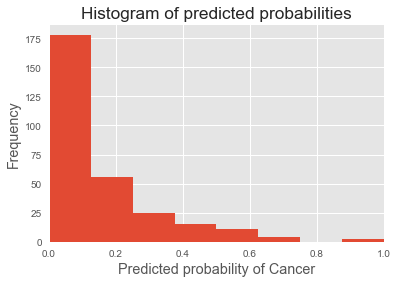

In [48]:
# store the predicted probabilities for class 1
y_pred_prob = clf_rf.predict_proba(test_features)[:, 1]

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Cancer')
plt.ylabel('Frequency')

We can see from the first bar
Most of observations have probability from 0 to 0.2
Small number of observations with probability > 0.6


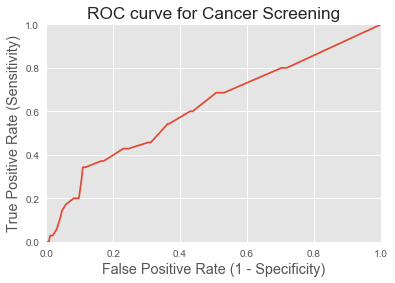

In [49]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities

# we pass y_test and y_pred_prob
# we do not use y_pred_class, because it will give incorrect results without generating an error
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate
# tpr: true positive rate
fpr, tpr, thresholds = metrics.roc_curve(test_labels, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Cancer Screening')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [50]:
print(metrics.roc_auc_score(test_labels,y_pred_prob))

0.6191964285714285


In [ ]:
# #import PipeLine, SelectKBest transformer, and RandomForest estimator classes
# from sklearn.pipeline import Pipeline
# from sklearn.feature_selection import SelectKBest
# from sklearn.ensemble import RandomForestClassifier

# #initialize randomforest and selectKbest
# selector = SelectKBest(k=100)
# clf = RandomForestClassifier()

# #place SelectKbest transformer and RandomForest estimator into Pipeine
# pipe = Pipeline(steps=[('selector', selector), ('clf', clf)])
                     

## Hyperparameter Tuning Using GridsearchCV

To improve upon current model, we use hyperparameter tuning using GridSearchCV

**Steps**
1. Select the model and get parameters.
2. Gridsearch for best parameters.
3. Fit the model using best parameters
4. Measure using F1 Score and ROC_AUC Score

### Get Parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


rfc=RandomForestClassifier(random_state=42)
rfc.get_params()

### Create parameter dictionary to retrieve best parameters

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(train_features_res, train_labels_res)
CV_rfc.best_params_

### Use best parameters for training the model

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto',
                            n_estimators= 500, max_depth=8, criterion='gini'
#                             , class_weight = {0:.001, 1: .999} 
                           )

rfc1.fit(train_features_res, train_labels_res)
pred=rfc1.predict(test_features)

print(metrics.f1_score(test_labels,pred))
print(metrics.roc_auc_score(test_labels,pred))
# 0.206896551724 without hyperparameter tuning

In [ ]:
# from sklearn.svm import SVC

# svc = SVC()
# GridSearchCV.get_params(svc)

# param_grid = [{'random_state': [42],
#            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#            'C': [0.1,1,10,100,1000],
#            'gamma': [0.1,1,10,100,1000]}]

# CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv= 5)
# CV_svc.fit(train_features_res, train_labels_res)
# CV_svc.best_params_

# svc1= SVC(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

# svc1.fit(train_features_res, train_labels_res)
# pred = svc1.predict(test_features)

# print(metrics.f1_score(test_labels,pred))
# print(metrics.roc_auc_score(test_labels,pred))


### Repeat for other models and compare

We now repeat the process for KNN, Decision Tree and Adaboost. We compare and select the model with the best scores.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.get_params()

In [ ]:
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)

CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv= 5)
CV_knn.fit(train_features_res, train_labels_res)
CV_knn.best_params_

In [ ]:
knn1 = KNeighborsClassifier(n_neighbors= 2, weights='distance')

knn1.fit(train_features_res, train_labels_res)
pred=knn1.predict(test_features)

print(metrics.f1_score(test_labels,pred))
print(metrics.roc_auc_score(test_labels,pred))
# 0.206896551724 without hyperparameter tuning

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.get_params()


In [ ]:
param_grid = {'random_state': [42],
           'n_estimators': range(1,30)}

CV_ada = GridSearchCV(estimator=ada, param_grid=param_grid, cv= 5)
CV_ada.fit(train_features_res, train_labels_res)
CV_ada.best_params_

In [ ]:
ada1 = AdaBoostClassifier(n_estimators=24, random_state=42)

ada1.fit(train_features_res, train_labels_res)
pred=ada1.predict(test_features)

print(metrics.f1_score(test_labels,pred))
print(metrics.roc_auc_score(test_labels,pred))
# 0.206896551724 without hyperparameter tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.get_params()

In [ ]:
param_grid = {'random_state': [42],
              'min_samples_leaf': range(1,30),'min_samples_split': range(2,30)}

CV_DTC = GridSearchCV(estimator=DTC, param_grid=param_grid, cv= 5)
CV_DTC.fit(train_features_res, train_labels_res)
CV_DTC.best_params_

In [ ]:
dtc1 = DecisionTreeClassifier(min_samples_leaf= 1, min_samples_split= 2, random_state=42)

dtc1.fit(train_features_res, train_labels_res)
pred=dtc1.predict(test_features)

print(metrics.f1_score(test_labels,pred))
print(metrics.roc_auc_score(test_labels,pred))
# 0.206896551724 without hyperparameter tuning

## Results

We compare different models by their F1 Score and ROC_AUC for classification problems.

**Model** | **F1 Score** | **ROC_AUC**
--- | --- | ---
*Random Forest*  | 0.155 | 0.525
*K Nearest Neighbour* | 0.203| 0.534
*Adaboost*|0.193|0.537
*Decision Tree Classifier* | 0.227 | 0.557




### Can we go a step further? Feature Selection

In [ ]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(train_features_res, train_labels_res)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_features_res.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
# list(train_features_res)[1:len(list(train_features_res))]

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(train_features_res.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(train_features_res.shape[1]), X.columns[indices],rotation=90)
plt.xlim([-1, train_features_res.shape[1]])
plt.show()

In [ ]:
df_fullna2 = df_fullna.drop(['STDs:pelvic inflammatory disease','STDs:AIDS', 'STDs:cervical condylomatosis','STDs:molluscum contagiosum','STDs:Hepatitis B'],axis=1)
list(df_fullna2)[1:len(list(df_fullna2))]

In [ ]:
feature_cols2 = list(df_fullna2)[1:len(list(df_fullna2))-1]
# X is a matrix, hence we use [] to access the features we want in feature_cols
X2 = df_fullna2[feature_cols2]

# y is a vector, hence we use dot to access 'label'
y2 = df_fullna2.screening

# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
train_features2, test_features2, train_labels2, test_labels2 = train_test_split(X2, y2, random_state=0, test_size = 0.5)

from imblearn.over_sampling import SMOTE
from sklearn import metrics

sm2 = SMOTE(random_state = 12, ratio = 1)
train_features_res2, train_labels_res2 = sm.fit_sample(train_features2, train_labels2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTC2 = DecisionTreeClassifier()

param_grid = {'random_state': [42],
              'min_samples_leaf': range(1,30),'min_samples_split': range(2,30)}

CV_DTC2 = GridSearchCV(estimator=DTC2, param_grid=param_grid, cv= 5)
CV_DTC2.fit(train_features_res2, train_labels_res2)
CV_DTC2.best_params_

In [ ]:
dtc2 = DecisionTreeClassifier(min_samples_leaf= 2, min_samples_split= 6, random_state=42)

dtc2.fit(train_features_res2, train_labels_res2)
pred2=dtc2.predict(test_features2)

print(metrics.f1_score(test_labels2,pred2))
print(metrics.roc_auc_score(test_labels2,pred2))
# 0.206896551724 without hyperparameter tuning

### Results

So we received an improvement from 0.227 to 0.229 in F1 Score and 0.557 to 0.558 in ROC_AUC

# Future Work

1. Develop Cost Functions to give more weight to the positive label
2. Implement for other models and compare. 
3. Collect more data to improve efficiency